In [1]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

<module 'util' from '../src/util.py'>

In [2]:
term=5
step=1
init=np.array([0.])
repeat_number=1

In [3]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [4]:
term=7
step=1
now_position=np.array([0.])
repeat_number=30000
matrix=np.zeros([term+1,repeat_number+1])

for j in range(repeat_number):
    now_position=np.array([0])
    for k in range(term):
        new_position = mymodel.one_step(now_position)
        matrix[k+1,j+1]=new_position
        now_position = new_position
#print(matrix)

In [5]:
cov_matrix=np.zeros([term+1,term+1])
for j in range(term+1):
    for k in range(term+1):
        mean_j=np.mean(matrix[j,:])
        mean_k=np.mean(matrix[k,:])
        mean_jk=(np.dot(matrix[j,:],matrix[k,:]))/repeat_number
        cov=mean_jk-mean_k*mean_j
        cov_matrix[j,k]=cov
print(cov_matrix)


[[ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.99211999  0.9921902   0.99764249  1.00168013  0.99835039
   0.9875407   0.9797193 ]
 [ 0.          0.9921902   1.99744813  2.00560898  2.01524654  2.00887927
   1.99238368  1.98388865]
 [ 0.          0.99764249  2.00560898  3.00011272  3.01586967  3.01681054
   3.00818131  3.00206265]
 [ 0.          1.00168013  2.01524654  3.01586967  4.03510949  4.03322991
   4.01505486  4.00462022]
 [ 0.          0.99835039  2.00887927  3.01681054  4.03322991  5.02676434
   5.0107269   5.00976949]
 [ 0.          0.9875407   1.99238368  3.00818131  4.01505486  5.0107269
   5.99415301  5.98917591]
 [ 0.          0.9797193   1.98388865  3.00206265  4.00462022  5.00976949
   5.98917591  6.98092653]]


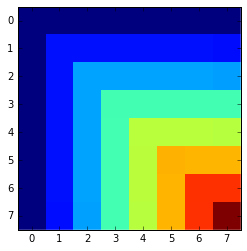

In [6]:
plt.imshow(cov_matrix, interpolation = "None")